In [ ]:
# importar pandas y nuympy
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("BD RIIEE 2021V3.csv")
df.head()

,País,ID Candidato,Género,Carrera Gestional,Avance,Semestres Totales,Postulados Si/No,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym,Ingles,Apto,Destacado,Ingresados Si/No
0,México,1.012101e+09,F,Ing. Industrial,NaN,NaN,Si,Si,Si,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Apto,Destacado,B2 - High Intermediate,Apto,Si,Si
1,México,1.012101e+09,F,Ing. Industrial,6,9,Si,Si,Si,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,Destacado,B2 - High Intermediate,Apto,Si,NaN
2,México,1.012101e+09,F,Ing. Industrial,8,9,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,México,1.012101e+09,F,Ing. Mecatrónica/Electrónica,6,9,Si,Si,Si,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,Apto,Destacado,B2 - High Intermediate,Apto,Si,Si
4,México,1.012101e+09,F,Negocios Internacionales,NaN,NaN,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(5742, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5742 entries, 0 to 5741
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   País                    5742 non-null   object 
 1   ID Candidato            2593 non-null   float64
 2   Género                  5741 non-null   object 
 3   Carrera Gestional       5383 non-null   object 
 4   Avance                  4371 non-null   object 
 5   Semestres Totales       3639 non-null   object 
 6   Postulados Si/No        1486 non-null   object 
 7   Evaluados Si/No         1192 non-null   object 
 8   Altamente Recomendado   239 non-null    object 
 9   Operaciones-Calidad     875 non-null    object 
 10  MTTO-DIMA               875 non-null    object 
 11  Comercial-Planeamiento  875 non-null    object 
 12  DIGI-SC                 875 non-null    object 
 13  Resto-Soft              875 non-null    object 
 14  Apto/No Apto            432 non-null    

In [ ]:
# Igualar valores repetidos de nivel de ingles
df = df.replace({'B1 – Low Intermediate': 'B1 - Low Intermediate', 'B2 – High Intermediate': 'B2 - High Intermediate'})

# Creamos una nueva columna que junta las columnas Apto y Destacado en una sola.

In [ ]:
new_col2 = []

In [ ]:
for uno,dos in zip(df["Apto"], df["Destacado"]):
  if uno == "Apto" and dos == "Si":
    new_col2.append("Destacado")
  elif uno == "Apto" and type(dos) == float:
    new_col2.append("Apto")
  else:
    new_col2.append(" ")
  
#Apto es str, nan es float 

In [ ]:
df["Apto"] = new_col2
del df["Destacado"]
df.rename( columns={"Apto":"Apto/ Destacado"} ,inplace=True)

In [ ]:
df.head()

,País,ID Candidato,Género,Carrera Gestional,Avance,Semestres Totales,Postulados Si/No,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym,Ingles,Apto/ Destacado,Ingresados Si/No
0,México,1.012101e+09,F,Ing. Industrial,NaN,NaN,Si,Si,Si,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Apto,Destacado,B2 - High Intermediate,Destacado,Si
1,México,1.012101e+09,F,Ing. Industrial,6,9,Si,Si,Si,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,Destacado,B2 - High Intermediate,Destacado,NaN
2,México,1.012101e+09,F,Ing. Industrial,8,9,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
3,México,1.012101e+09,F,Ing. Mecatrónica/Electrónica,6,9,Si,Si,Si,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,Apto,Destacado,B2 - High Intermediate,Destacado,Si
4,México,1.012101e+09,F,Negocios Internacionales,NaN,NaN,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [ ]:
df["Apto/ Destacado"].value_counts()

             5530
Apto          115
Destacado      97
Name: Apto/ Destacado, dtype: int64

## Reemplazando valores redundantes en postulados y evaluados

In [ ]:
#Checamos los valores que hay en postulados

df["Postulados Si/No"].value_counts()

Si    1431
Sí      54
SÍ       1
Name: Postulados Si/No, dtype: int64

In [ ]:
#Entonces reemplazamos valores para que solo haya uno solo de estas tres variantes, notar que el cambio se aplica a todo el dataframe
df = df.replace({'Sí': 'Si'})
df = df.replace({'SÍ': 'Si'})

In [ ]:
#Checamos que el cambio fue aplicado
df["Postulados Si/No"].value_counts()

Si    1486
Name: Postulados Si/No, dtype: int64

In [ ]:
#Se checa el cambio en la otra columna

df["Evaluados Si/No"].value_counts()

Si    1192
Name: Evaluados Si/No, dtype: int64

In [ ]:
#Tambien podemos checar que ya no hay en todas las columnas
(df=='Sí').sum()

País                      0
ID Candidato              0
Género                    0
Carrera Gestional         0
Avance                    0
Semestres Totales         0
Postulados Si/No          0
Evaluados Si/No           0
Altamente Recomendado     0
Operaciones-Calidad       0
MTTO-DIMA                 0
Comercial-Planeamiento    0
DIGI-SC                   0
Resto-Soft                0
Apto/No Apto              0
Destacado Pym             0
Ingles                    0
Apto/ Destacado           0
Ingresados Si/No          0
dtype: int64

## Convertir el ID a string

In [ ]:

df.dtypes

País                       object
ID Candidato              float64
Género                     object
Carrera Gestional          object
Avance                     object
Semestres Totales          object
Postulados Si/No           object
Evaluados Si/No            object
Altamente Recomendado      object
Operaciones-Calidad        object
MTTO-DIMA                  object
Comercial-Planeamiento     object
DIGI-SC                    object
Resto-Soft                 object
Apto/No Apto               object
Destacado Pym              object
Ingles                     object
Apto/ Destacado            object
Ingresados Si/No           object
dtype: object

In [ ]:
#Quedemonos unicamente con aquellos que realizaron las pruebas
df =df.dropna(subset=['Evaluados Si/No'])

In [ ]:
df.shape

(1192, 19)

In [ ]:
df.head()

,País,ID Candidato,Género,Carrera Gestional,Avance,Semestres Totales,Postulados Si/No,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym,Ingles,Apto/ Destacado,Ingresados Si/No
0,México,1.012101e+09,F,Ing. Industrial,NaN,NaN,Si,Si,Si,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Apto,Destacado,B2 - High Intermediate,Destacado,Si
1,México,1.012101e+09,F,Ing. Industrial,6,9,Si,Si,Si,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,Destacado,B2 - High Intermediate,Destacado,NaN
3,México,1.012101e+09,F,Ing. Mecatrónica/Electrónica,6,9,Si,Si,Si,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,Apto,Destacado,B2 - High Intermediate,Destacado,Si
4,México,1.012101e+09,F,Negocios Internacionales,NaN,NaN,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
5,México,1.012101e+09,M,Ing. Química,6,9,Si,Si,NaN,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,NaN,NaN,NaN,,NaN


# Borramos las filas que no sean de Mexicanos

In [ ]:
df["País"].value_counts()

México       1050
Argentina     101
Brasil         41
Name: País, dtype: int64

In [ ]:
df = df[df['País'] == "México"]

In [ ]:
df["País"].value_counts()

México    1050
Name: País, dtype: int64

In [ ]:
df.shape

(1050, 19)

# Reasignamos el ID de los candidatos

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
count = 0
y,z = df.shape
for x in range(y):
  df.at[count, "ID Candidato"] = count
  count += 1

In [ ]:
df

,País,ID Candidato,Género,Carrera Gestional,Avance,Semestres Totales,Postulados Si/No,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym,Ingles,Apto/ Destacado,Ingresados Si/No
0,México,0.0,F,Ing. Industrial,NaN,NaN,Si,Si,Si,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Apto,Destacado,B2 - High Intermediate,Destacado,Si
1,México,1.0,F,Ing. Industrial,6,9,Si,Si,Si,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,Destacado,B2 - High Intermediate,Destacado,NaN
2,México,2.0,F,Ing. Mecatrónica/Electrónica,6,9,Si,Si,Si,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,Apto,Destacado,B2 - High Intermediate,Destacado,Si
3,México,3.0,F,Negocios Internacionales,NaN,NaN,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
4,México,4.0,M,Ing. Química,6,9,Si,Si,NaN,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,NaN,NaN,NaN,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,México,1045.0,F,Derecho/Ciencias Políticas,5,9,Si,Si,NaN,Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Highly Recommend,Apto,Destacado,NaN,Destacado,Si
1046,México,1046.0,M,Ing. Mecatrónica/Electrónica,9,12 o más,Si,Si,NaN,Do Not Recommend,Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,NaN,NaN,,NaN
1047,México,1047.0,F,Ing. Química,7,10,Si,Si,NaN,Highly Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Apto,Destacado,NaN,,NaN
1048,México,1048.0,M,Ing. Mecatrónica/Electrónica,8,9,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [ ]:
df.shape

(1050, 19)

# Borramos la columna de País que ya no necesitaremos 

In [ ]:
del df['País']

In [ ]:
df

,ID Candidato,Género,Carrera Gestional,Avance,Semestres Totales,Postulados Si/No,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym,Ingles,Apto/ Destacado,Ingresados Si/No
0,0.0,F,Ing. Industrial,NaN,NaN,Si,Si,Si,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Apto,Destacado,B2 - High Intermediate,Destacado,Si
1,1.0,F,Ing. Industrial,6,9,Si,Si,Si,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,Destacado,B2 - High Intermediate,Destacado,NaN
2,2.0,F,Ing. Mecatrónica/Electrónica,6,9,Si,Si,Si,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,Apto,Destacado,B2 - High Intermediate,Destacado,Si
3,3.0,F,Negocios Internacionales,NaN,NaN,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
4,4.0,M,Ing. Química,6,9,Si,Si,NaN,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,NaN,NaN,NaN,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,1045.0,F,Derecho/Ciencias Políticas,5,9,Si,Si,NaN,Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Highly Recommend,Apto,Destacado,NaN,Destacado,Si
1046,1046.0,M,Ing. Mecatrónica/Electrónica,9,12 o más,Si,Si,NaN,Do Not Recommend,Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Apto,NaN,NaN,,NaN
1047,1047.0,F,Ing. Química,7,10,Si,Si,NaN,Highly Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,Highly Recommend,Apto,Destacado,NaN,,NaN
1048,1048.0,M,Ing. Mecatrónica/Electrónica,8,9,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Candidato            1050 non-null   float64
 1   Género                  1050 non-null   object 
 2   Carrera Gestional       1050 non-null   object 
 3   Avance                  878 non-null    object 
 4   Semestres Totales       812 non-null    object 
 5   Postulados Si/No        1050 non-null   object 
 6   Evaluados Si/No         1050 non-null   object 
 7   Altamente Recomendado   239 non-null    object 
 8   Operaciones-Calidad     823 non-null    object 
 9   MTTO-DIMA               823 non-null    object 
 10  Comercial-Planeamiento  823 non-null    object 
 11  DIGI-SC                 823 non-null    object 
 12  Resto-Soft              823 non-null    object 
 13  Apto/No Apto            432 non-null    object 
 14  Destacado Pym           224 non-null    

## Gráficos varios

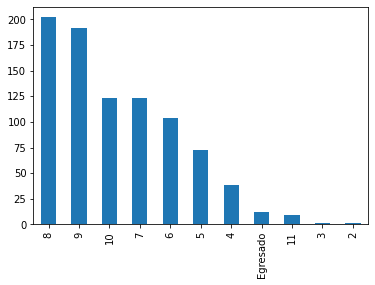

In [ ]:
df['Avance'].value_counts().plot(kind='bar')

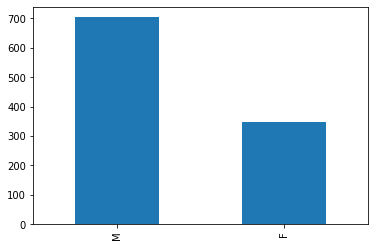

In [ ]:
df['Género'].value_counts().plot(kind='bar')

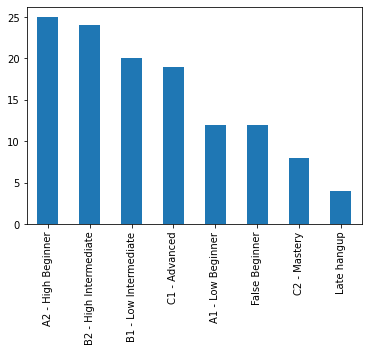

In [ ]:
df['Ingles'].value_counts().plot(kind='bar')

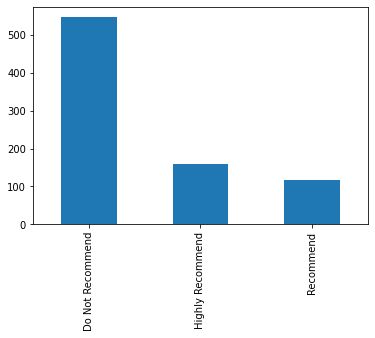

In [ ]:
df['Operaciones-Calidad'].value_counts().plot(kind='bar')

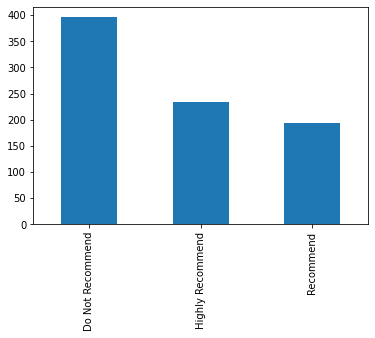

In [ ]:
df['MTTO-DIMA'].value_counts().plot(kind='bar')

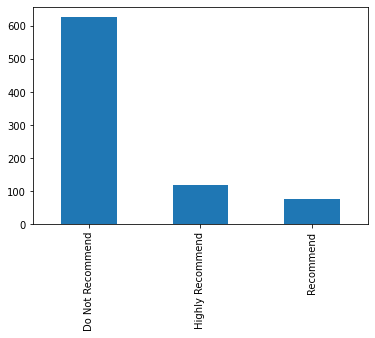

In [ ]:
df['Comercial-Planeamiento'].value_counts().plot(kind='bar')

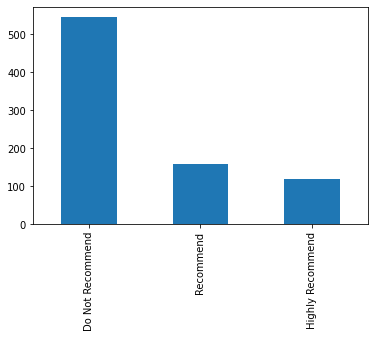

In [ ]:
df['DIGI-SC'].value_counts().plot(kind='bar')

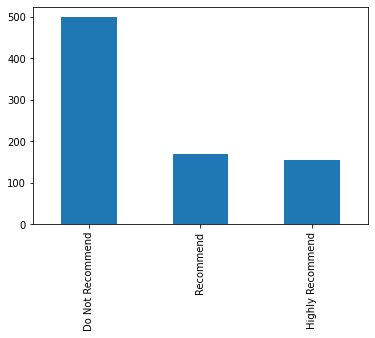

In [ ]:
df['Resto-Soft'].value_counts().plot(kind='bar')

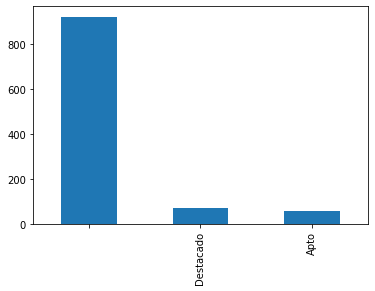

In [ ]:
df['Apto/ Destacado'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.patches.Wedge at 0x7facdf5f3ad0>,
 [Text(-0.5613613869275037, 0.9459774803169628, 'Hombres'),
  Text(0.5613613869275035, -0.9459774803169628, 'Mujeres')],
 [Text(-0.3061971201422747, 0.5159877165365251, '67.05%'),
  Text(0.3061971201422746, -0.5159877165365251, '32.95%')])

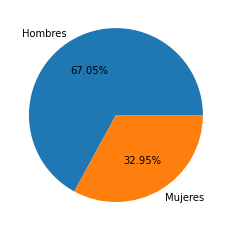

In [ ]:
dato1 = [df['Género'].value_counts()]
dato2 = ["Hombres","Mujeres"]
plt.pie(dato1, labels = dato2,autopct='%1.2f%%')

Aquí es donde se intenta llenar los NA como lo hizo el equipo 6, pero si se hace esto la columna de "Destacado Pym" ya no aparece

In [ ]:
df['Operaciones-Calidad'] = df['Operaciones-Calidad'].fillna(0)
df['MTTO-DIMA'] = df['MTTO-DIMA'].fillna(0)
df['Comercial-Planeamiento'] = df['Comercial-Planeamiento'].fillna(0)
df['DIGI-SC'] = df['DIGI-SC'].fillna(0)
df['Resto-Soft'] = df['Resto-Soft'].fillna(0)

##  A las 5 columnas de las pruebas, cambiamos las variables categóricas por números

1 = Do Not Recommend

3 = Recommend

5 = Highly Recommend

Aquí cambie los valores 0,1,2 por los valores 1,3,5 como recomendación de mis compañeros, pero parece que no funciono ya que los coeficientes que aparecen en la tabla de correlación siguen igual

In [ ]:
df = df.replace({'Do Not Recommend': 1, 'Recommend': 3, 'Highly Recommend': 5})

Este cambio es de los avances y semestres entonces no influye mucho en la tabla de correlación

In [ ]:
df = df.replace({'2': 2})
df = df.replace({'3': 3})
df = df.replace({'4': 4})
df = df.replace({'5': 5})
df = df.replace({'6': 6})
df = df.replace({'7': 7})
df = df.replace({'8': 8})
df = df.replace({'9': 9})
df = df.replace({'10': 10})
df = df.replace({'11': 11})
df = df.replace({'12': 12})
df = df.replace({'12 o más': 13})
df = df.replace({'Egresado': 14})


## Inglés: “False Beginner” y “Late hangup” reemplazarlos con 0, luego igualar valores repetidos y asignar un valor numérico a las variables categóricas

A1 - Low Beginner = 1

A2 - High Beginner = 2

B1 - Low Intermediate = 3

B2 - High Intermediate = 4

C1 - Advanced = 5

C2 - Mastery = 6

In [ ]:

df = df.replace({'False Beginner': 0, 'Late hangup': 0})

In [ ]:
df = df.replace({'A1 - Low Beginner': 1, 'A2 - High Beginner': 2, 'B1 - Low Intermediate': 3, 'B2 - High Intermediate': 4, 'C1 - Advanced': 5, 'C2 - Mastery': 6})

En las siguientes lineas se utiliza la función .replace() para reemplazar el texto por un numero, no se si esto sea un motivo de nuestros coeficientes bajos

In [ ]:
df['Apto/No Apto'] = df['Apto/No Apto'].replace({'Apto': 1, 'No Apto' : 0})

In [ ]:
df['Apto/ Destacado'] = df['Apto/ Destacado'].replace({'Apto': 1, 'Destacado' : 2})

En las siguiente lineas de código lo que hice fueron conversiones a binario usando .replace() para a Destacado sea igual a 1 y que los NA sean iguales a cero con fillna, otra vez, no sé este sea el problema por utilizar .replace() y no algun otro metodo

In [ ]:
df['Destacado Pym'] = df['Destacado Pym'].replace({'Destacado': 1})
df['Destacado Pym'] = df['Destacado Pym'].replace({'Si': 1})
df['Destacado Pym'] = df['Destacado Pym'].fillna(0)

Lo mismo se hizo con otras variables en el uso de .replace() y fillna()

In [ ]:
df['Ingresados Si/No'] = df['Ingresados Si/No'].replace({'Si': 1})
df['Ingresados Si/No'] = df['Ingresados Si/No'].fillna(0)
df['Apto/No Apto'] = df['Apto/No Apto'].fillna(0)
df['Ingles'] = df['Ingles'].fillna(0)
df['Apto/ Destacado'] = df['Apto/ Destacado'].fillna(0)

In [ ]:
df.head()

,ID Candidato,Género,Carrera Gestional,Avance,Semestres Totales,Postulados Si/No,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym,Ingles,Apto/ Destacado,Ingresados Si/No
0,0.0,F,Ing. Industrial,NaN,NaN,Si,Si,Si,5,3,5,1,1,1.0,1.0,4.0,2,1.0
1,1.0,F,Ing. Industrial,6.0,9.0,Si,Si,Si,5,1,1,1,1,1.0,1.0,4.0,2,0.0
2,2.0,F,Ing. Mecatrónica/Electrónica,6.0,9.0,Si,Si,Si,5,5,1,3,5,1.0,1.0,4.0,2,1.0
3,3.0,F,Negocios Internacionales,NaN,NaN,Si,Si,NaN,0,0,0,0,0,0.0,0.0,0.0,,0.0
4,4.0,M,Ing. Química,6.0,9.0,Si,Si,NaN,1,1,1,1,1,0.0,0.0,0.0,,0.0


In [ ]:
df.shape

(1050, 18)

### Conversión de valores para correcta interpretación de tabla de correlación

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Candidato            1050 non-null   float64
 1   Género                  1050 non-null   object 
 2   Carrera Gestional       1050 non-null   object 
 3   Avance                  878 non-null    float64
 4   Semestres Totales       812 non-null    float64
 5   Postulados Si/No        1050 non-null   object 
 6   Evaluados Si/No         1050 non-null   object 
 7   Altamente Recomendado   239 non-null    object 
 8   Operaciones-Calidad     1050 non-null   int64  
 9   MTTO-DIMA               1050 non-null   int64  
 10  Comercial-Planeamiento  1050 non-null   int64  
 11  DIGI-SC                 1050 non-null   int64  
 12  Resto-Soft              1050 non-null   int64  
 13  Apto/No Apto            1050 non-null   float64
 14  Destacado Pym           1050 non-null   

In [ ]:
df["Apto/No Apto"] = df["Apto/No Apto"].astype('int64')
#df["Avance"] = df["Avance"].astype('int64')
#df["Semestres Totales"] = df["Semestres Totales"].astype('int64')
df["Ingles"] = df["Ingles"].astype('int64')
df["Ingresados Si/No"] = df["Ingresados Si/No"].astype('int64')

In [ ]:
(df['Destacado Pym']=='Si').sum()

0

In [ ]:
df["Destacado Pym"] = df["Destacado Pym"].astype('int64')

In [ ]:
#Transformemos el ID a object
df['ID Candidato'] = df['ID Candidato'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Candidato            1050 non-null   object 
 1   Género                  1050 non-null   object 
 2   Carrera Gestional       1050 non-null   object 
 3   Avance                  878 non-null    float64
 4   Semestres Totales       812 non-null    float64
 5   Postulados Si/No        1050 non-null   object 
 6   Evaluados Si/No         1050 non-null   object 
 7   Altamente Recomendado   239 non-null    object 
 8   Operaciones-Calidad     1050 non-null   int64  
 9   MTTO-DIMA               1050 non-null   int64  
 10  Comercial-Planeamiento  1050 non-null   int64  
 11  DIGI-SC                 1050 non-null   int64  
 12  Resto-Soft              1050 non-null   int64  
 13  Apto/No Apto            1050 non-null   int64  
 14  Destacado Pym           1050 non-null   

# Los datos usando herramientas de visualización

Aquí esta la tabla de correlación, como ven no estoy excluyendo ninguna columna, también depues de la tabla ya no esta comentado pero es porque ahorita no es necesario

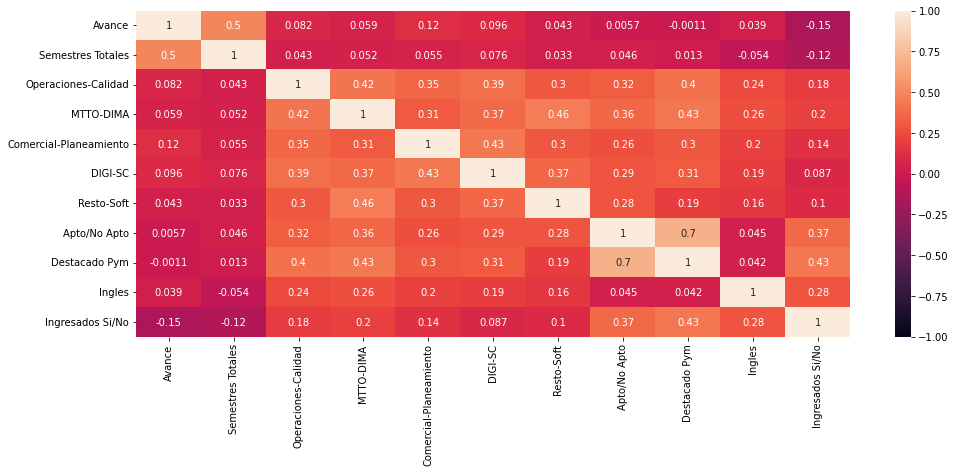

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [ ]:
#sns.pairplot(df)

**Medidas estadísticas de las variables de las pruebas pym**

In [ ]:
# mostrar medidas estadísticas como media, desviación estándar, mínimo, máximo, entre otros
df["Operaciones-Calidad"].describe()

count    1050.000000
mean        1.614286
std         1.649677
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         5.000000
Name: Operaciones-Calidad, dtype: float64

In [ ]:
df["MTTO-DIMA"].describe()

count    1050.000000
mean        2.040952
std         1.850782
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         5.000000
Name: MTTO-DIMA, dtype: float64

In [ ]:
df["Comercial-Planeamiento"].describe()

count    1050.000000
mean        1.383810
std         1.475677
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: Comercial-Planeamiento, dtype: float64

In [ ]:
df["DIGI-SC"].describe()

count    1050.000000
mean        1.540000
std         1.531624
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         5.000000
Name: DIGI-SC, dtype: float64

In [ ]:
df["Resto-Soft"].describe()

count    1050.000000
mean        1.696190
std         1.655244
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         5.000000
Name: Resto-Soft, dtype: float64

In [ ]:
df["Ingles"].describe()

count    1050.000000
mean        0.343810
std         1.119583
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: Ingles, dtype: float64

In [ ]:
# mostrar mediana, en todos estos la mediana fue 0

df["Operaciones-Calidad"].median()
df["Comercial-Planeamiento"].median()
df["DIGI-SC"].median()
df["Resto-Soft"].median()

1.0

In [ ]:
df["MTTO-DIMA"].median()

1.0

In [ ]:
# mostrar moda, todas fueron 0

df["Operaciones-Calidad"].mode()
df["MTTO-DIMA"].mode()
df["Comercial-Planeamiento"].mode()
df["DIGI-SC"].mode()
df["Resto-Soft"].mode()


0    1
dtype: int64

In [ ]:
# mostrar varianza
df["Operaciones-Calidad"].var()

2.7214353806346114

In [ ]:
df["MTTO-DIMA"].var()

3.425394706977224

In [ ]:
df["Comercial-Planeamiento"].var()

2.1776213173543706

In [ ]:
df["DIGI-SC"].var()

2.345872259294566

In [ ]:
df["Resto-Soft"].var()

2.7398329474783614

In [ ]:
# mostrar rango, en todas el rango es 2

df["Operaciones-Calidad"].max() - df["Operaciones-Calidad"].min()
df["MTTO-DIMA"].max() - df["MTTO-DIMA"].min()
df["Comercial-Planeamiento"].max() - df["Comercial-Planeamiento"].min()
df["DIGI-SC"].max() - df["DIGI-SC"].min()
df["Resto-Soft"].max() - df["Resto-Soft"].min()


5

In [ ]:
df

,ID Candidato,Género,Carrera Gestional,Avance,Semestres Totales,Postulados Si/No,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym,Ingles,Apto/ Destacado,Ingresados Si/No
0,0.0,F,Ing. Industrial,NaN,NaN,Si,Si,Si,5,3,5,1,1,1,1,4,2,1
1,1.0,F,Ing. Industrial,6.0,9.0,Si,Si,Si,5,1,1,1,1,1,1,4,2,0
2,2.0,F,Ing. Mecatrónica/Electrónica,6.0,9.0,Si,Si,Si,5,5,1,3,5,1,1,4,2,1
3,3.0,F,Negocios Internacionales,NaN,NaN,Si,Si,NaN,0,0,0,0,0,0,0,0,,0
4,4.0,M,Ing. Química,6.0,9.0,Si,Si,NaN,1,1,1,1,1,0,0,0,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,1045.0,F,Derecho/Ciencias Políticas,5.0,9.0,Si,Si,NaN,3,1,1,5,5,1,1,0,2,1
1046,1046.0,M,Ing. Mecatrónica/Electrónica,9.0,13.0,Si,Si,NaN,1,3,1,1,1,1,0,0,,0
1047,1047.0,F,Ing. Química,7.0,10.0,Si,Si,NaN,5,5,1,1,5,1,1,0,,0
1048,1048.0,M,Ing. Mecatrónica/Electrónica,8.0,9.0,Si,Si,NaN,0,0,0,0,0,0,0,0,,0


In [ ]:
df.to_csv('dfResumidoV1.csv')

# Implementación del modelo de clasificación

In [ ]:
dfm = pd.read_csv("dfLimpioV1.csv")
dfm.head()

,Unnamed: 0,ID Candidato,Género,Carrera Gestional,Avance,Semestres Totales,Postulados Si/No,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Apto/No Apto,Destacado Pym,Ingles,Apto/ Destacado,Ingresados Si/No
0,0,0.0,F,Ing. Industrial,NaN,NaN,Si,Si,Si,5,3,5,1,1,1,1,4,2,1
1,1,1.0,F,Ing. Industrial,6.0,9.0,Si,Si,Si,5,1,1,1,1,1,1,4,2,0
2,2,2.0,F,Ing. Mecatrónica/Electrónica,6.0,9.0,Si,Si,Si,5,5,1,3,5,1,1,4,2,1
3,3,3.0,F,Negocios Internacionales,NaN,NaN,Si,Si,NaN,0,0,0,0,0,0,0,0,,0
4,4,4.0,M,Ing. Química,6.0,9.0,Si,Si,NaN,1,1,1,1,1,0,0,0,,0


## Asignación de variable dependiente e independiente

Para la variable dependiente o nuestra variable a intentar a predecir es la de "Destacado Pym", esta variable tiene una asignación binaria donde 1 es Destacado y 0 es No destacado.

Y para las variables dependientes se escogieron las 5 pruebas Pym metrics que realiza ternium, una prueba de "soft skills" y el clasificador de si son gente Apta o no.

Para las 6 pruebas realizadas se les asigno un valor numérico en base a su resultado, "Do not recommend" se le dió 1, a "Recommend" 3, y a "Highly Recommend" 5. A los valores NA se cambiaron por 0.

Por último nuestra variable Apto/No Apto se le da también una asignación binaria al igual que la variable dependiente, donde 1 es Apto y 0 es No Apto

In [ ]:
feature_names = ['Operaciones-Calidad', 'MTTO-DIMA', 'Comercial-Planeamiento', 'DIGI-SC', 'Resto-Soft']
feature_predict = ['Destacado Pym']
X = dfm[feature_names]
y = dfm[feature_predict]

## Balanceo de datos

Como vimos que un problema que se tenía era que nuestros datos se encontraban desbalanceados lo primero que se hizo fue aplicar una tecnica de balanceo

In [ ]:
ros = RandomOverSampler(random_state=888, shrinkage=0.1)
X_, y_ = ros.fit_resample(X, y)

y_.value_counts()

Destacado Pym
0                826
1                826
dtype: int64

Una vez con el balanceo hecho podemos asignar nuestros datos de entrenamiento y nuestros datos de prueba

In [ ]:
#Separo los datos del dataset en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2) #20% de prueba y 80 de entrenamiento

## Explicaciones de algunas metricas de calificación

**Exactitud** = Que tan bueno es en general

**Error de clasificación** = Que tanto se equivoca el metodo

**Sensitividad** = Cuando el valor realmente es positivo, que tan bien lo predice

**Especificidad** = Cuando el valor real es negativo, que tan bien lo predice

**Falsos positivos** = Cuando el valor de verdad es negativo, que tanto se equivoca

**Precisión** = Cuando se predice un valor verdadero, que tanto lo acierta

## Modelo a utilizar

Como bien se mencionó en el documento rector, debido a los resultados de nuestros procesos individuales y al conocimiento que tenemos de estos mismos, llegamos a la decisión de utilizar el metodo de bosques aleatorios, pero debido a que este metodo solo es una iteración de arboles de decisión, podemos anexar el modelo de arboles para generar un gráfico que ayude a explicarlo

## Ajuste de hiperparametros

Podemos utilizar el ajuste de hiperparametros para poder encontrar que valores son optimos para nuestra situación en especifico, para esto utilizaremos el metodo de GridSearch

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = { 
    'n_estimators': [10,50,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4,5,6,7, 8],
    'criterion' :['gini', 'entropy']
}
rfc =RandomForestClassifier(random_state=29)
rfc_gscv=GridSearchCV(estimator=rfc, param_grid=param_grid, scoring="roc_auc") # cv default = 5
rfc_gscv.fit(X_,y_.values.ravel())

print("Tuned best parameters for random forest: ",rfc_gscv.best_params_ ) 
print("Best score: {}".format(rfc_gscv.best_score_))

Tuned best parameters for random forest:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 50}
Best score: 0.9373808401650681


In [ ]:
algoritmoRandom = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth = 8, max_features = 'auto')
#Entreno el modelo
algoritmoRandom.fit(X_train, y_train.values.ravel())
#Realizo una predicción
y_predR = algoritmoRandom.predict(X_test)

In [ ]:
cfmR = confusion_matrix(y_test, y_predR)
print(cfmR)
print(classification_report(y_test, y_predR))
TP2 = cfmR[1][1]
FP2 = cfmR[0][1]
TN2 = cfmR[0][0]
FN2 = cfmR[1][0]
print(TP2)
print(FP2)
print(TN2)
print(FN2)

[[145  27]
 [  8 151]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       172
           1       0.85      0.95      0.90       159

    accuracy                           0.89       331
   macro avg       0.90      0.90      0.89       331
weighted avg       0.90      0.89      0.89       331

151
27
145
8


In [ ]:
print("Exactitud: ",(TP2 + TN2) / float(TP2 + TN2 + FP2 + FN2))

#Error de clasificación
classification_error2 = (FP2 + FN2) / float(TP2 + TN2 + FP2 + FN2)
print("Error de clasificación: ",classification_error2)

#Sensitividad
sensitivity2 = TP2 / float(FN2 + TP2)
print("Sensitividad",sensitivity2)

#Especificidad
specificity2 = TN2 / (TN2 + FP2)
print("Especificidad: ",specificity2)

#Falsos positivos
false_positive_rate2 = FP2 / float(TN2 + FP2)
print("Falsos positivos: ",false_positive_rate2)

#Precisión
precision2 = TP2 / float(TP2 + FP2)
print("Precisión: ",precision2)

#F1
F1_2 = (2*sensitivity2*precision2)/float(sensitivity2+precision2)
print("F1: ", F1_2)

Exactitud:  0.8942598187311178
Error de clasificación:  0.10574018126888217
Sensitividad 0.949685534591195
Especificidad:  0.8430232558139535
Falsos positivos:  0.1569767441860465
Precisión:  0.848314606741573
F1:  0.8961424332344213


In [ ]:
pred_pro2 = algoritmoRandom.predict_proba(X_test)
        
auc_score2 = roc_auc_score(y_test,pred_pro2[:,1,])
        
print(auc_score2)

0.9663960801521135


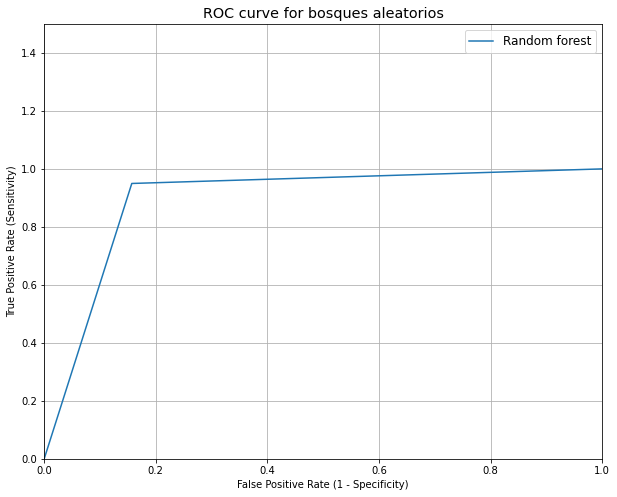

In [ ]:
plt.figure(figsize=(10, 8))
fpr_r, tpr_r, thresholds_r = metrics.roc_curve(y_test, y_predR)
   
plt.plot(fpr_r, tpr_r, label = "Random forest")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.5])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for bosques aleatorios')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend()

In [ ]:
#Cross validation score by k-folds
scoresR = cross_val_score(algoritmoRandom, X_, y_.values.ravel(), cv=5, scoring='f1_macro')
print("Array de las scores: ",scoresR)
# Calculate the mean of the scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresR.mean(), scoresR.std() * 2))

Array de las scores:  [0.60582306 0.80332739 0.84197035 0.99696967 0.99696967]
Accuracy: 0.85 (+/- 0.29)


In [ ]:
import joblib

joblib.dump(algoritmoRandom, "model.pkl")

['model.pkl']

### Modelo de arboles de decisión como herramienta de visualización

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, 5, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

param_grid = {"max_depth": [3, None],
              "max_features": ['auto'],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
#tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, scoring="roc_auc")
tree_cv = GridSearchCV(tree, param_grid, cv=5, scoring="roc_auc")

In [ ]:
# Fit it to the data
tree_cv.fit(X_, y_)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4}
Best score is 0.9224206578379632


Ya con los parametros encontrados podemos ahora aplicar el modelo

In [ ]:
from enum import auto
algoritmoArbol = DecisionTreeClassifier(criterion = 'gini', max_depth = None, max_features = 'auto', min_samples_leaf = 4)
#Entreno el modelo
algoritmoArbol.fit(X_train, y_train.values.ravel())
#Realizo una predicción
y_predA = algoritmoArbol.predict(X_test)

De aquí podemos sacar la matriz de confusión para saber que tan bien se desempeña este modelo en distintos ambitos

In [ ]:
cfmA = confusion_matrix(y_test, y_predA)
print(cfmA)
print(classification_report(y_test, y_predA))
TP = cfmA[1][1]
FP = cfmA[0][1]
TN = cfmA[0][0]
FN = cfmA[1][0]
print(TP)
print(FP)
print(TN)
print(FN)

[[145  27]
 [ 18 141]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       172
           1       0.84      0.89      0.86       159

    accuracy                           0.86       331
   macro avg       0.86      0.86      0.86       331
weighted avg       0.87      0.86      0.86       331

141
27
145
18


In [ ]:
print("Exactitud: ",(TP + TN) / float(TP + TN + FP + FN))

#Error de clasificación
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print("Error de clasificación: ",classification_error)

#Sensitividad
sensitivity = TP / float(FN + TP)
print("Sensitividad",sensitivity)

#Especificidad
specificity = TN / (TN + FP)
print("Especificidad: ",specificity)

#Falsos positivos
false_positive_rate = FP / float(TN + FP)
print("Falsos positivos: ",false_positive_rate)

#Precisión
precision = TP / float(TP + FP)
print("Precisión: ",precision)

#F1
F1 = (2*sensitivity*precision)/float(sensitivity+precision)
print("F1: ", F1)

Exactitud:  0.8640483383685801
Error de clasificación:  0.13595166163141995
Sensitividad 0.8867924528301887
Especificidad:  0.8430232558139535
Falsos positivos:  0.1569767441860465
Precisión:  0.8392857142857143
F1:  0.8623853211009174


También podemos sacar su curva ROC y el area bajo la curva respectiva

0.9419518794793038


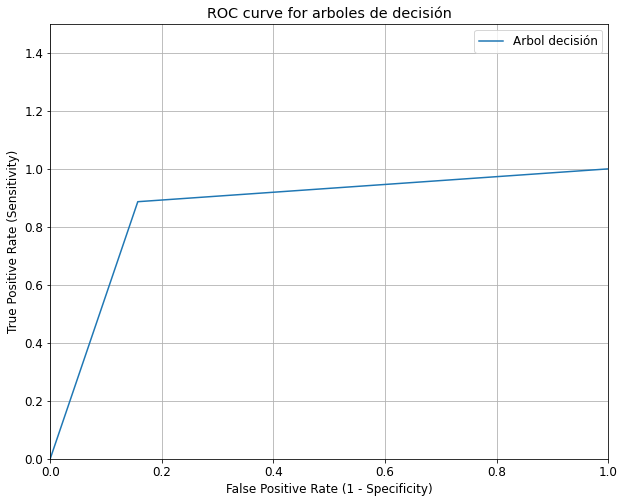

In [ ]:
pred_prob3 = algoritmoArbol.predict_proba(X_test)
        
auc_score3 = roc_auc_score(y_test,pred_prob3[:,1,])
        
print(auc_score3)
plt.figure(figsize=(10, 8))
fpr_a, tpr_a, thresholds_a = metrics.roc_curve(y_test, y_predA)
   
plt.plot(fpr_a, tpr_a, label = "Arbol decisión")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.5])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for arboles de decisión')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend()

Por ultimo como resultados de precisión podemos hacer un metodo de validación cruzada como medida extra

In [ ]:
#Cross validation score by k-folds
scoresA = cross_val_score(algoritmoArbol, X_, y_.values.ravel(), cv=5, scoring='f1_macro')
print("Array de las scores: ",scoresA)
# Calculate the mean of the scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresA.mean(), scoresA.std() * 2))

Array de las scores:  [0.58197474 0.79196244 0.83121146 0.972715   0.97877833]
Accuracy: 0.83 (+/- 0.29)


## Gráficos del arbol

In [ ]:
algoritmoArbol = DecisionTreeClassifier(random_state=1234)
model = algoritmoArbol.fit(X_, y_)

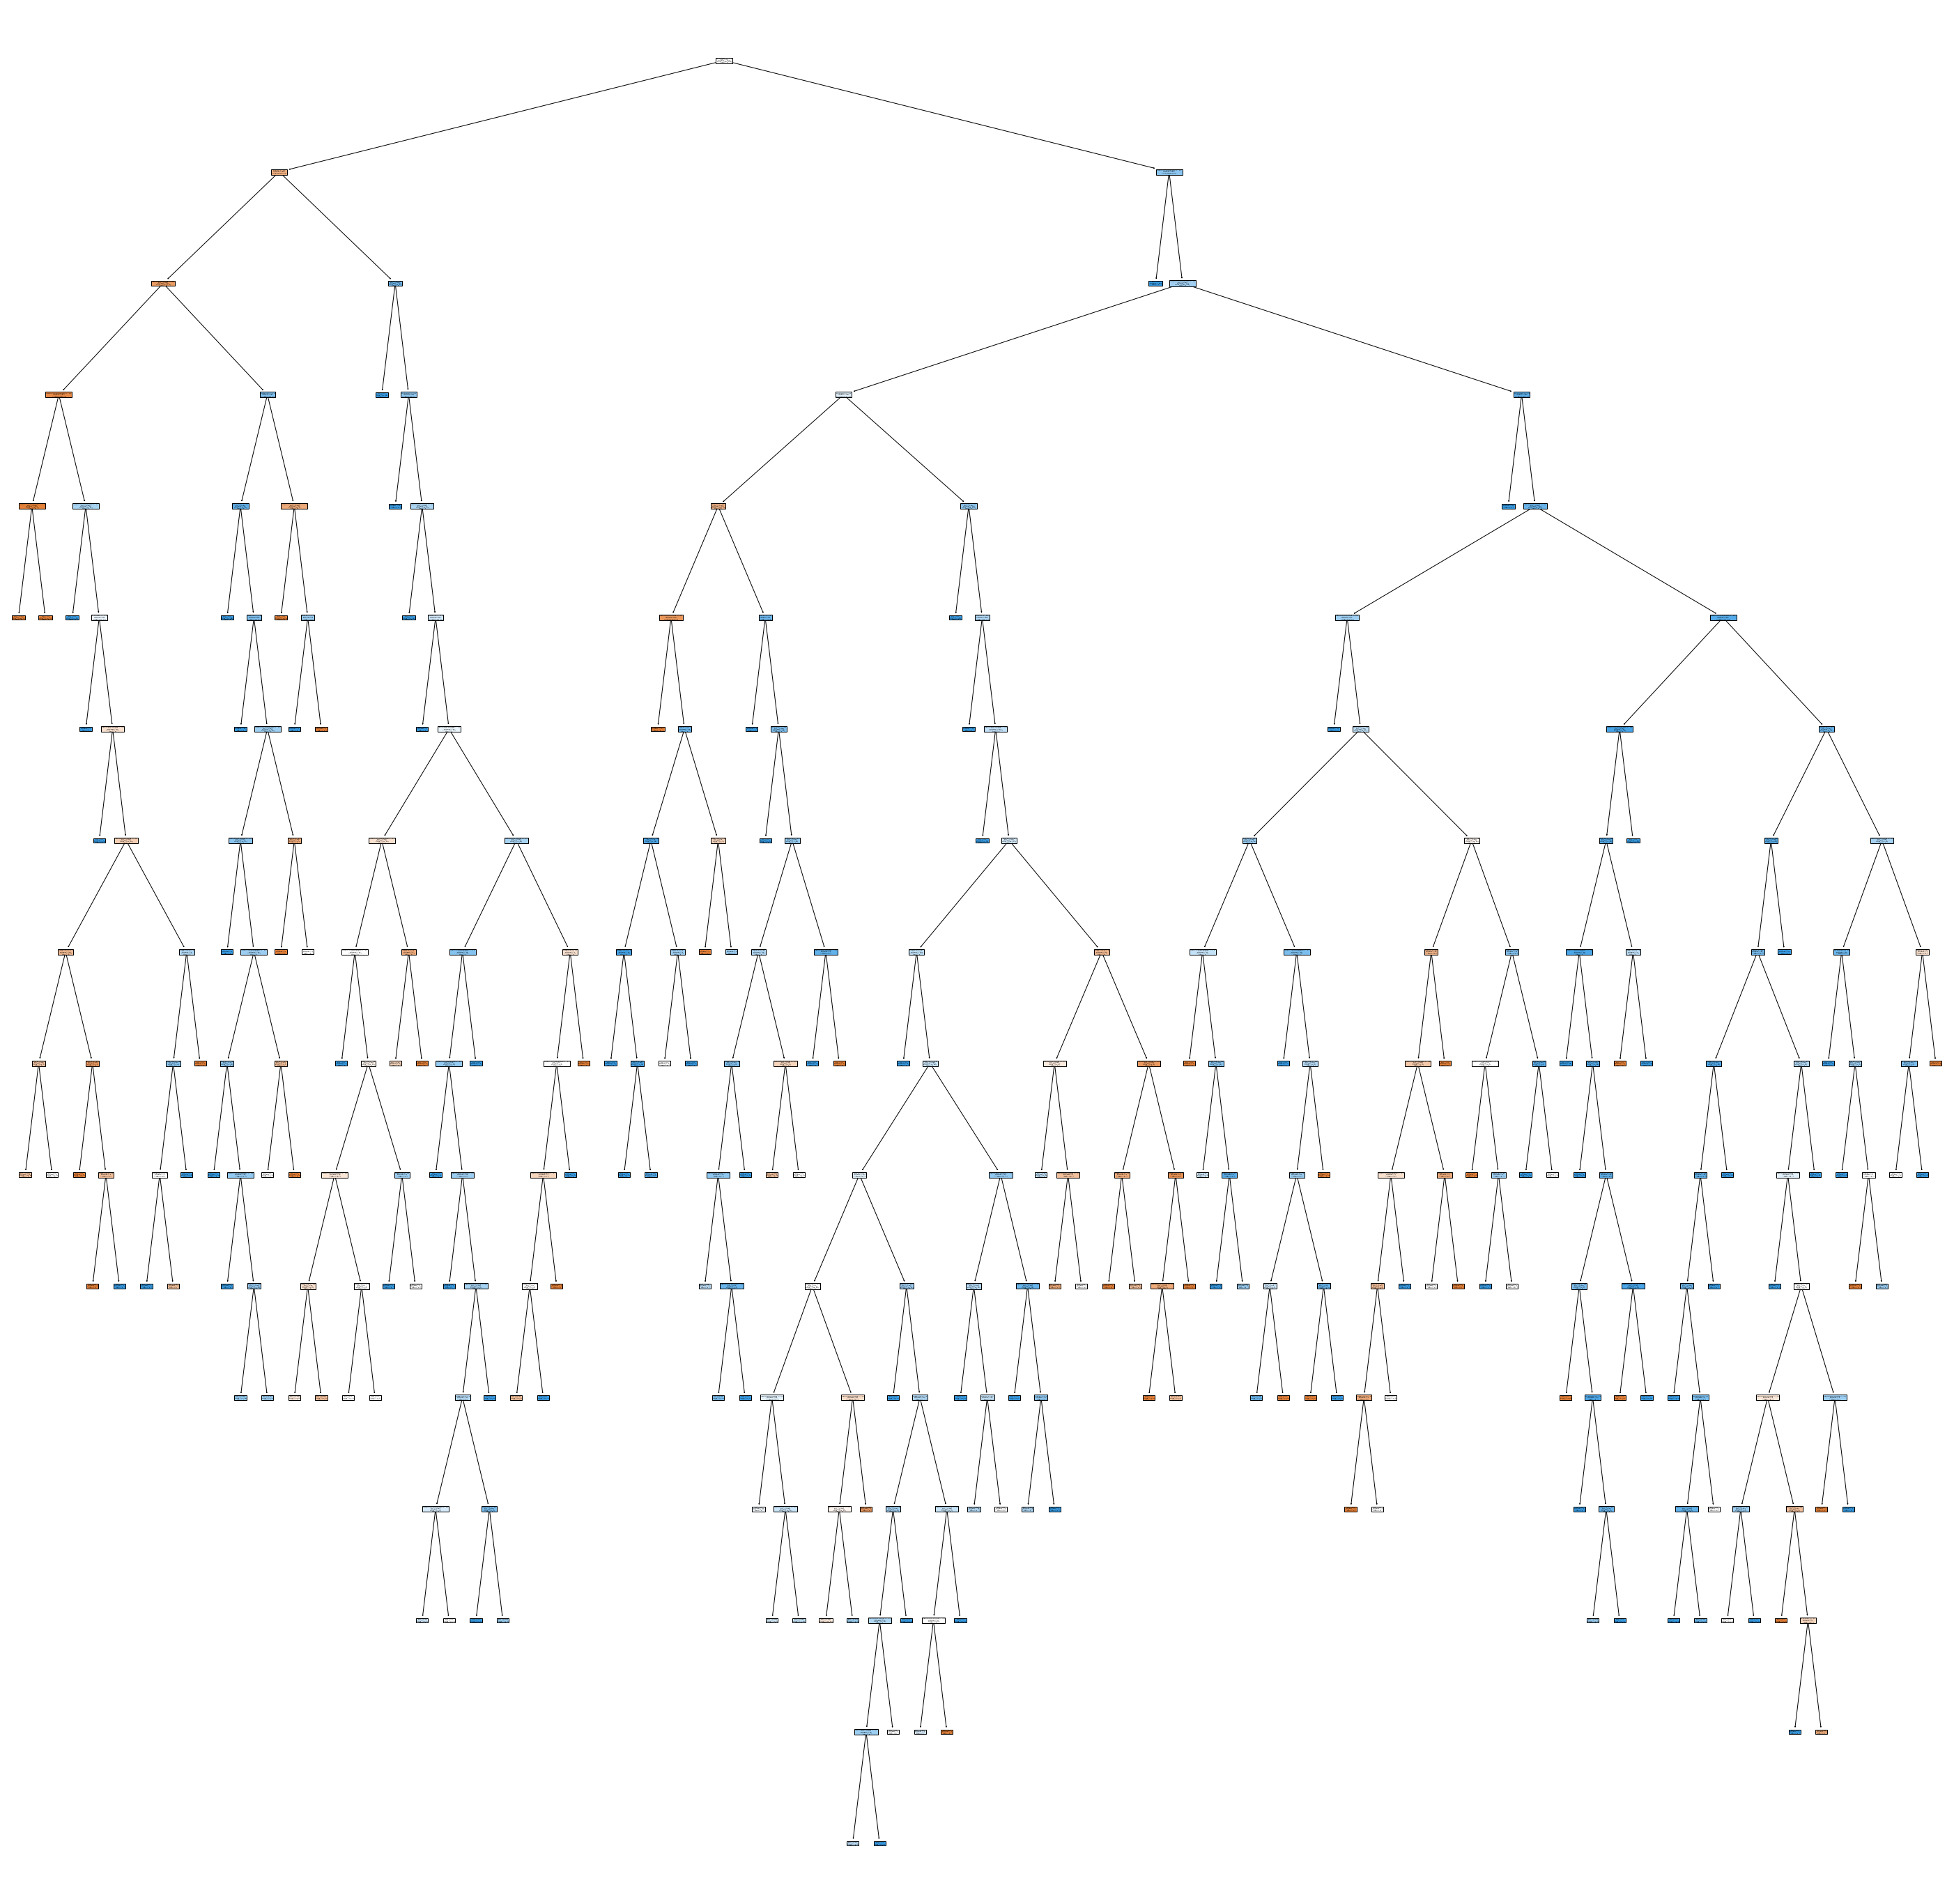

In [ ]:
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(algoritmoArbol, feature_names=("Operaciones-Calidad","MTTO-DIMA","Comercial-Planeamiento","DIGI-SC","Resto-Soft"), class_names = ("Destacado Pym"), filled=True)

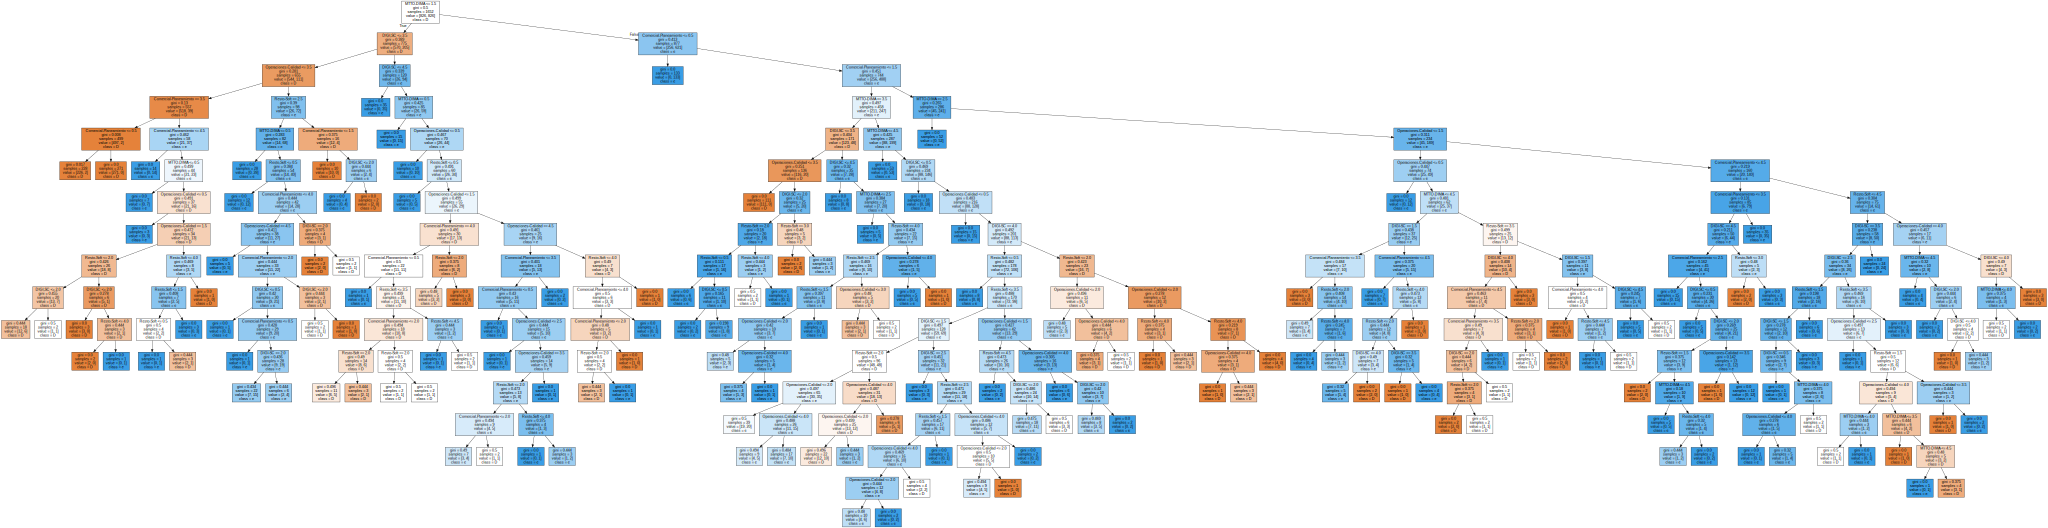

In [ ]:
import graphviz
#DOT data, no descomentar esto
dot_data = tree.export_graphviz(algoritmoArbol, out_file=None, feature_names=("Operaciones-Calidad","MTTO-DIMA","Comercial-Planeamiento","DIGI-SC","Resto-Soft"), class_names = ("Destacado Pym") , filled=True)

#Draw graph, tampoco descomentar esto
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'